# 資料探索與分析(Exploratory Data Analysis, EDA) 

## 從兩個面向分析：
### 1. 描述統計量(Descriptive statistics)。
### 2. 資料視覺化(Data Visualization)：統計圖。

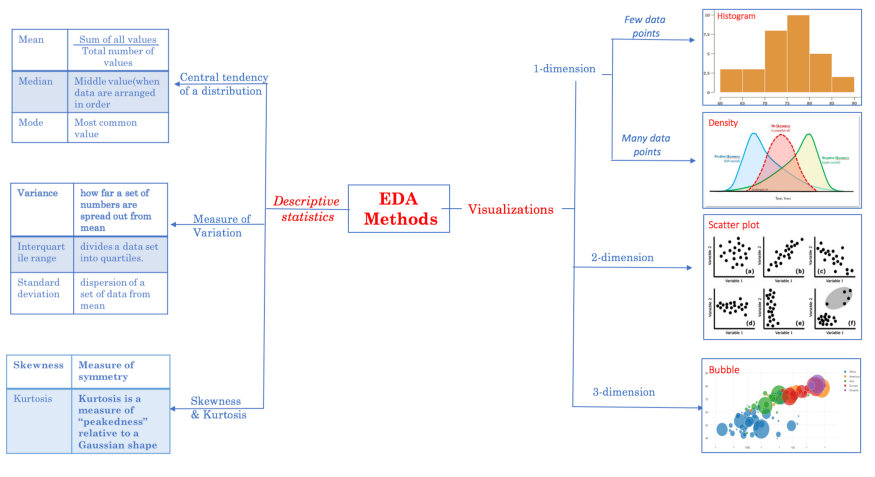

In [1]:
from IPython.display import Image
Image('./EDA.png', width=800)

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fix 中文亂碼 
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 

## 計程車小費預測

In [3]:
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## 平均數(Mean)
### $\begin{equation}\bar{x} = \frac{\displaystyle\sum_{i=1}^{n}x_{i}}{n}\end{equation}$
###  ***x&#772;*** ：樣本平均數，***&mu;*** ：母體平均數

In [4]:
df.survived.mean()

0.3838383838383838

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# object 欄位統計
df.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [8]:
# 所有欄位統計
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 中位數(Median)：較不受離群值(Outlier)影響。
### 資料集筆數為單數：第 $\begin{equation}\frac{n+1}{2}\end{equation}$ 筆
### 資料集筆數為偶數：第 $\begin{equation}\frac{n}{2} \; 與 \; \frac{n}{2} + 1\end{equation}$ 筆的平均數


In [9]:
df.age.median(), df.age.mean()

(28.0, 29.69911764705882)

<Axes: >

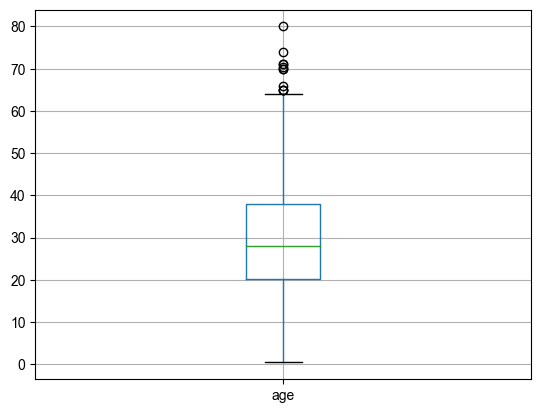

In [10]:
df.boxplot(column=['age'])

## 眾數(Mode)：發生頻率最高的數值，多數決。
### 可能有多組，故回傳資料為list。

In [11]:
df.age.mode()

0    24.0
Name: age, dtype: float64

In [12]:
# pd.options.display.max_rows = None
df.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

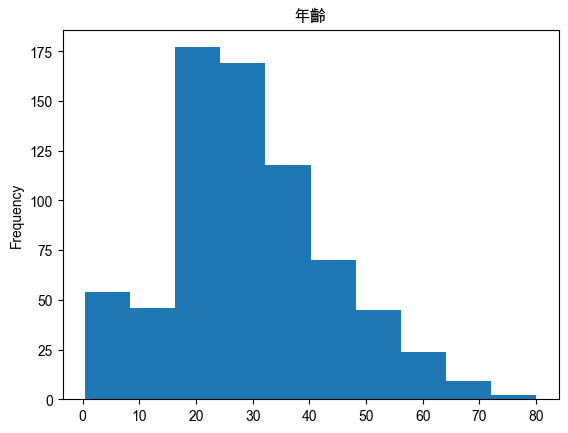

In [13]:
df['age'].plot.hist(title='年齡')
plt.show();

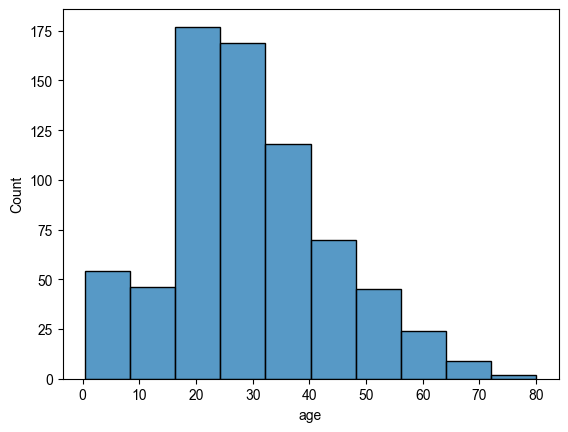

In [14]:
sns.histplot(df['age'], bins=10)
plt.show();

## 偏態(Skewness)

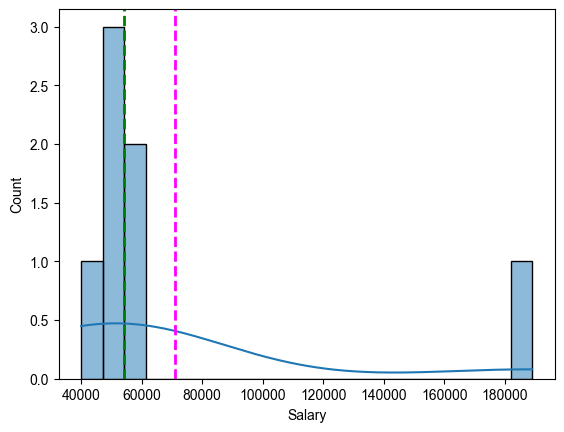

In [15]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

salary = df['Salary']
sns.histplot(salary, kde=True)
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

### 資料呈現偏態(skewed)，右邊形成長尾(long tail)，稱之為右偏態(right-skewed)或正偏態，因為有極少的高值將平均數它向右邊。

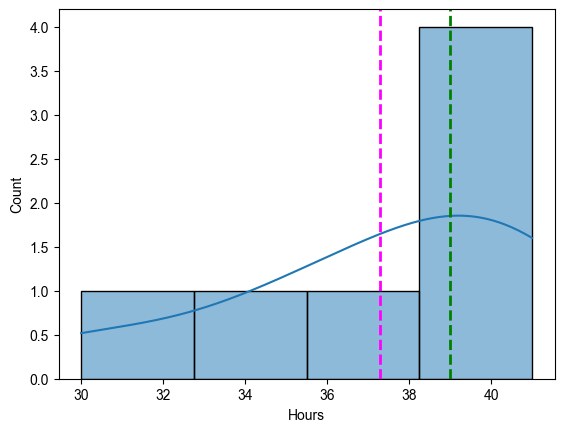

In [16]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})
Hours = df['Hours']
sns.histplot(Hours, kde=True)
plt.axvline(Hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(Hours.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

### 資料呈左偏態(left-skewed)或負偏態。

In [17]:
df = pd.read_csv('./data/president_heights.csv')
df

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


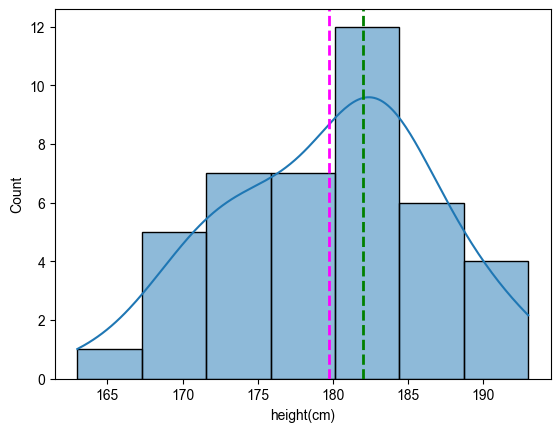

In [18]:
height = df['height(cm)']
sns.histplot(height, kde=True)
plt.axvline(height.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(height.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

### 資料無偏態。

In [19]:
# 偏態(Skewness)
height.skew()

-0.2520337007049649

## 峰度(Kurtosis)：衡量資料集中的程度。
### Pandas 峰度為修正過的值，常態分配峰度=0(未修正的值=3)。

In [20]:
height.kurt()

-0.3823273337498865

# 衡量資料變異的程度(Measures of Variance)
### 1. 級距(Range)：最大值 - 最小值。
### 2. 百分位數、四分位數。
### 3. 變異數、標準差。

In [21]:
# 級距(Range)
print(height.max(), height.min())
height.max() - height.min()

193 163


30

In [22]:
# 四分位數
height.describe()

count     42.000000
mean     179.738095
std        7.015869
min      163.000000
25%      174.250000
50%      182.000000
75%      183.000000
max      193.000000
Name: height(cm), dtype: float64

In [23]:
# 百分位數
height.describe(np.arange(0.1, 1.0, 0.1))

count     42.000000
mean     179.738095
std        7.015869
min      163.000000
10%      170.100000
20%      173.000000
30%      175.600000
40%      178.000000
50%      182.000000
60%      183.000000
70%      183.000000
80%      185.000000
90%      188.000000
max      193.000000
Name: height(cm), dtype: float64

## 箱形圖(box plot)或盒鬚圖，可以觀察：
### 1. 中位數
### 2. 四分位數(Q1~Q3)
### 3. 最小值、最大值
### 4. 離群值

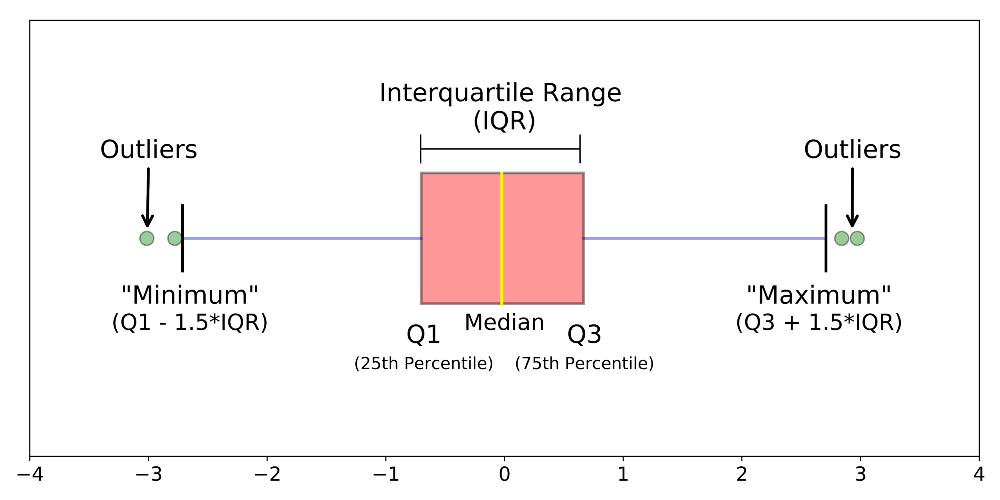

In [24]:
from IPython.display import Image
Image('Boxplot.png', width=1000)

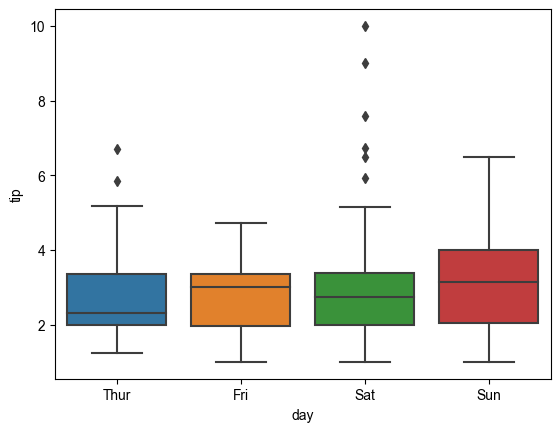

In [25]:
df2 = sns.load_dataset('tips')
sns.boxplot(x='day', y='tip', data=df2)
plt.show();

## 離群值(Outliers)發生的原因包括輸入錯誤、感測器錯誤或是異常訊號，後者可能是設備故障的前兆。
## 需判別發生原因後，再決定處理方式。

## 變異數(Variance)：衡量資料散佈的程度。
### 母體變異數(Variance)： $\begin{equation}\sigma^{2} = \frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}\end{equation}$
### 樣本變異數： $\begin{equation}s^{2} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}\end{equation}$
### 母體標準差(Standard Deviation)： $\begin{equation}\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}}\end{equation}$
### 樣本標準差：$\begin{equation}s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}}\end{equation}$

In [26]:
# 樣本變異數
height.var()

49.22241579558653

In [27]:
# 母體變異數
height.var(ddof=0)

48.05045351473923

In [28]:
# 樣本標準差
height.std()

7.015868855358296

In [29]:
# 母體標準差
height.std(ddof=0)

6.931843442745893

## 常態分配(Normal Distribution)與標準差(Standard Deviation)

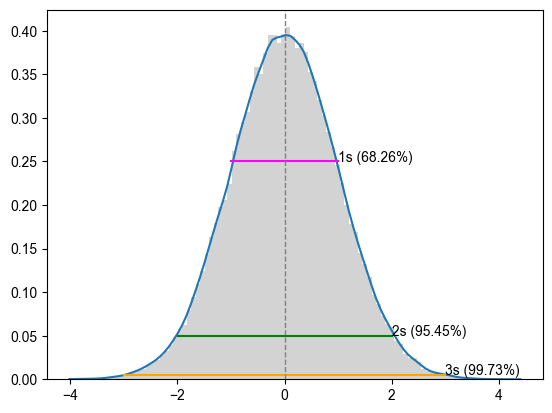

In [30]:
import scipy.stats as stats

# Create a random standard normal distribution
df = pd.DataFrame(np.random.randn(100000, 1), columns=['Grade'])

# Plot the distribution as a histogram with a density curve
grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', density=True, bins=100)  
plt.plot(x, density(x))

# Get the mean and standard deviation
s = df['Grade'].std()
m = df['Grade'].mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = [0.25, 0.25]
plt.plot(x1,y1, color='magenta')
plt.annotate('1s (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = [0.05, 0.05]
plt.plot(x2,y2, color='green')
plt.annotate('2s (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = [0.005, 0.005]
plt.plot(x3,y3, color='orange')
plt.annotate('3s (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(grade.mean(), color='grey', linestyle='dashed', linewidth=1)

plt.show()

# 資料視覺化(Data Visualization)：常用統計圖

In [31]:
# 鐵達尼資料集，欄位說明：https://www.kaggle.com/competitions/titanic/data
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## 長條圖(Bar Chart)：比較各類資料的大小。

In [32]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [33]:
plt.title('生存人數統計', fontsize=20)
df['survived'].value_counts().plot.bar();

In [34]:
plt.title('生存人數統計', fontsize=20)
sns.countplot(x='survived', data=df);

In [35]:
# 依上船港口分類
plt.title('生存人數統計', fontsize=20)
sns.countplot(x='survived', hue='embark_town', data=df);

In [36]:
plt.title("平均年齡", fontsize=20);
sns.barplot(x='survived', y='age', data=df);

In [37]:
plt.title("平均年齡", fontsize=20);
sns.barplot(x='survived', y='age', hue='pclass', data=df);

## 直方圖(Histogram)：針對連續型變數分組(bins)統計筆數。

In [38]:
df['age'].plot.hist(title='年齡'); # , bins=5

In [39]:
sns.histplot(df['age'], bins=10);

In [40]:
sns.kdeplot(df['age'])

<Axes: title={'center': '年齡'}, xlabel='age', ylabel='Frequency'>

## 餅圖(Pie Chart)：觀察各類資料的比例

In [41]:
df['survived'].value_counts().plot.pie(title='生存人數統計', labels=['死亡', '生存']) 
# plt.pie(genderCounts, labels=['male', 'female'],explode=[0.2, 0.])
plt.legend();

In [42]:
df['embark_town'].value_counts().plot.pie(title='生存人數統計', explode=[0.2, 0., 0.], autopct='%1.1f%%', shadow=True);

In [43]:
value_list = np.array(list(df['embark_town'].value_counts()))
value_list

array([644, 168,  77])

In [44]:
def show_value(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{absolute:d}\n({pct:.1f}%)"

df['embark_town'].value_counts().plot.pie(title='生存人數統計', explode=[0.2, 0., 0.], shadow=True
                             , autopct=lambda pct: show_value(pct, value_list));

## 散佈圖(Scatter Plot)：觀察定量特徵間的關係，也可以觀察是否有離群值(outliers)。

In [45]:
df.plot.scatter(title='生存與年齡是否高度相關?', x='age', y='survived');

In [46]:
df = sns.load_dataset('tips')
df.plot.scatter(title='小費與總計程車費是否高度相關?', x='total_bill', y='tip');

In [47]:
sns.scatterplot(x='total_bill', y='tip', data=df);

In [48]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df);

## 折線圖(Line Chart)：觀察時間的趨勢

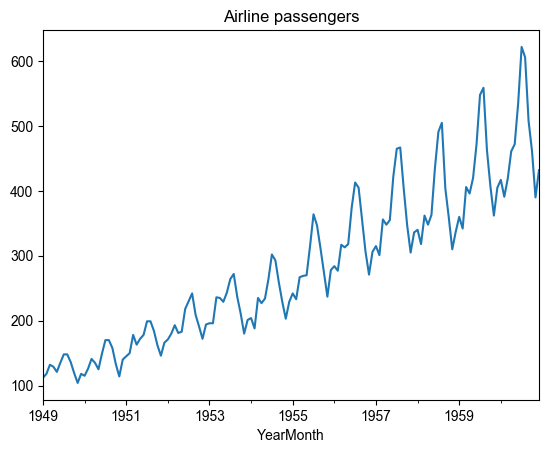

In [55]:
df = pd.read_csv('./data/international-airline-passengers.csv', skiprows=1, names=['YearMonth', '乘客數'])
df['YearMonth'] = pd.to_datetime(df['YearMonth'] + '-01') #.replace("-", "", regex=True).astype(int) 
df.plot(title='Airline passengers', x='YearMonth', y='乘客數', legend=None)
plt.show()

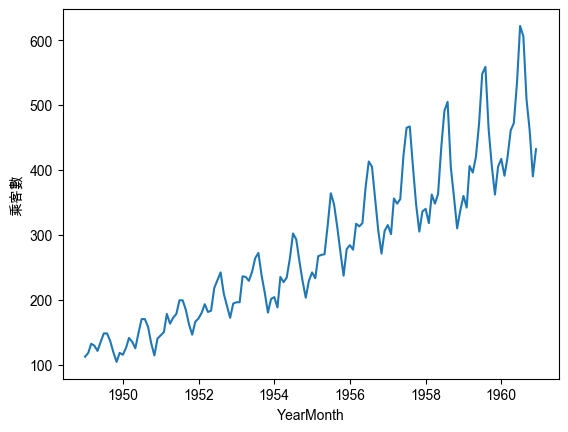

In [56]:
sns.lineplot(x='YearMonth', y='乘客數', data=df)
plt.show()

## Pair Plot

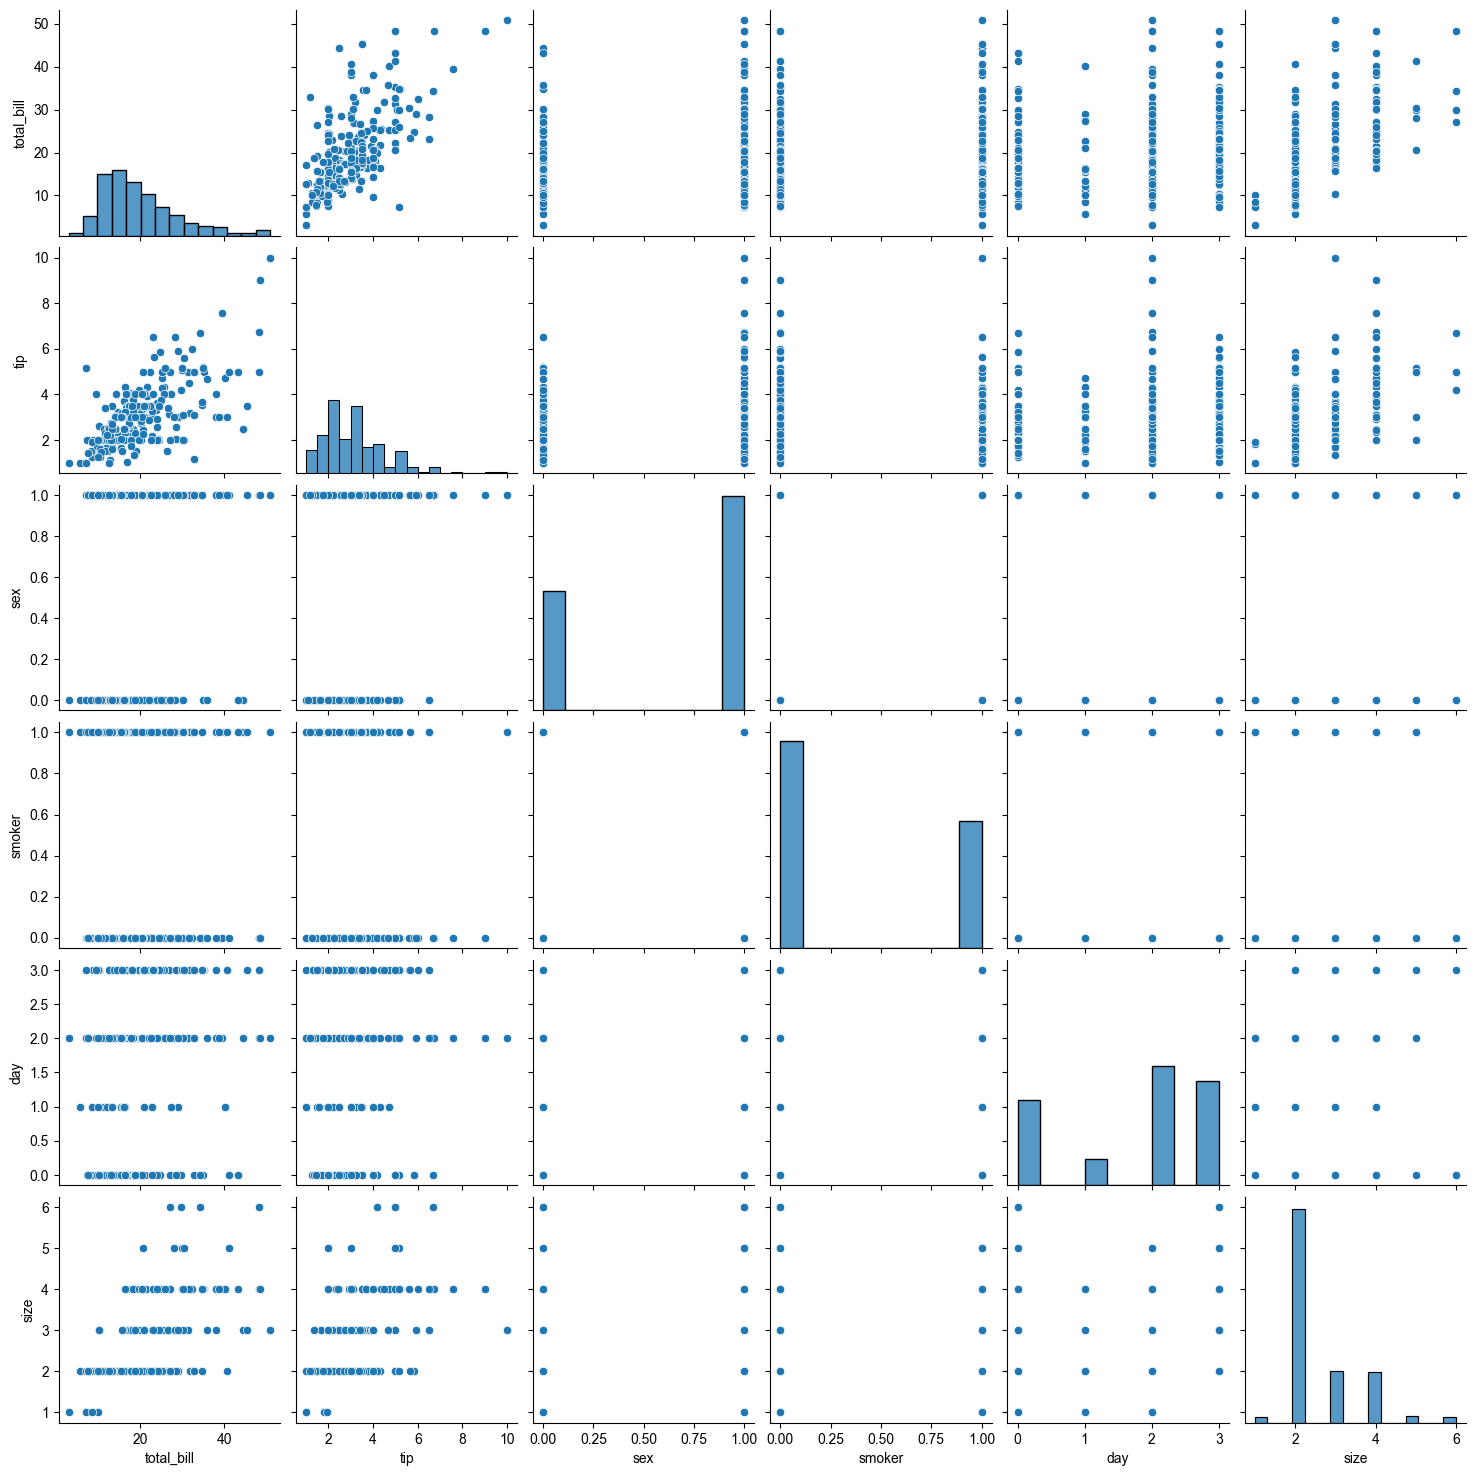

In [57]:
df = sns.load_dataset('tips')
# 類別欄位轉為數值
df.sex = df.sex.map({'Female':0, 'Male':1}).astype(int)
df.smoker = df.smoker.map({'No':0, 'Yes':1}).astype(int)
df.day = df.day.map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3}).astype(int)
df.time = df.time.map({'Lunch':0, 'Dinner':1})
sns.pairplot(data=df)
plt.show()

## PairGrid

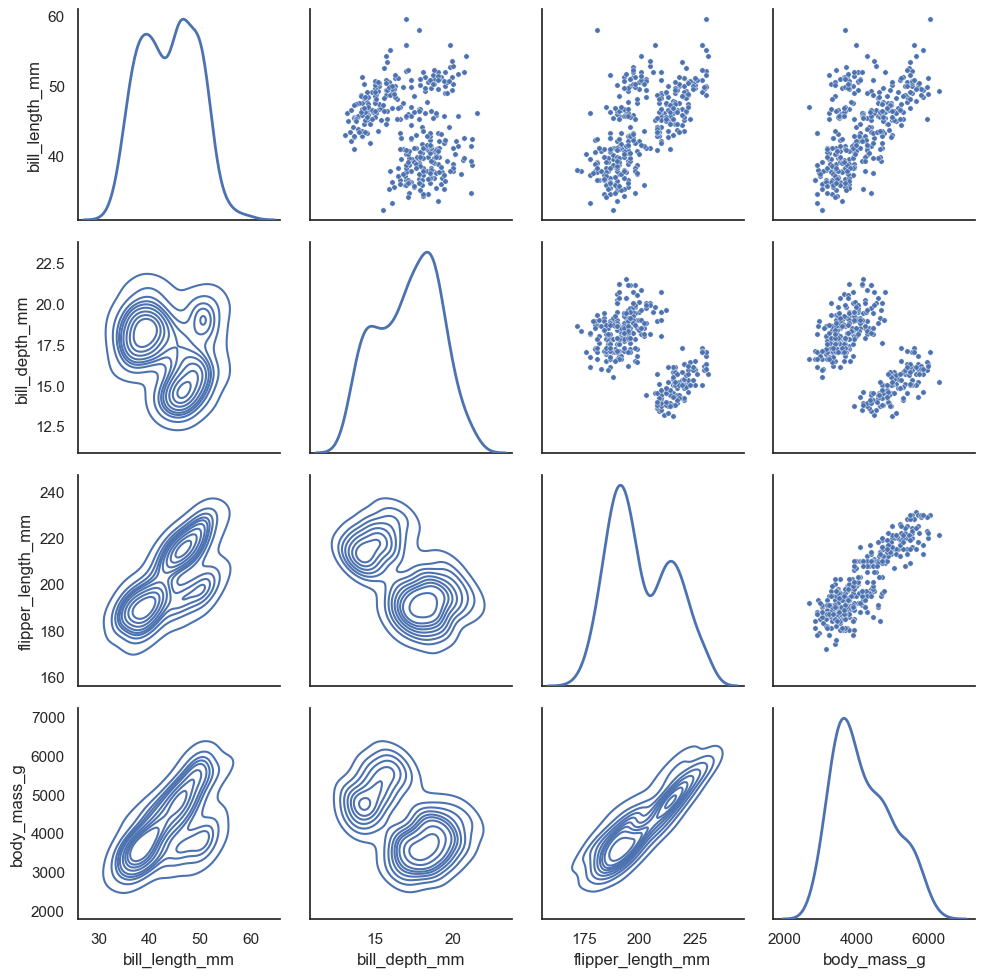

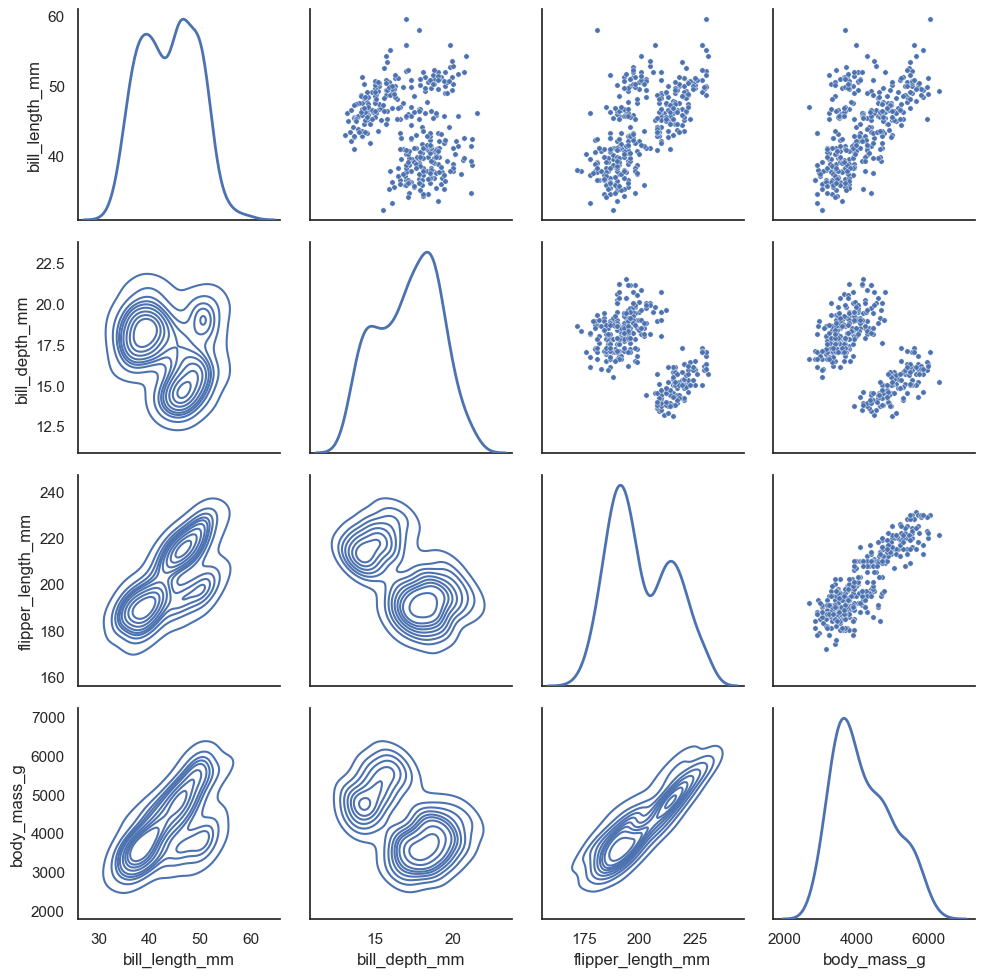

In [59]:
df = sns.load_dataset("penguins")

sns.set_theme(style="white")
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.show()

## 多變數(Multivariate data)分析

In [60]:
# 特徵規模不一致
df = sns.load_dataset('penguins')
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


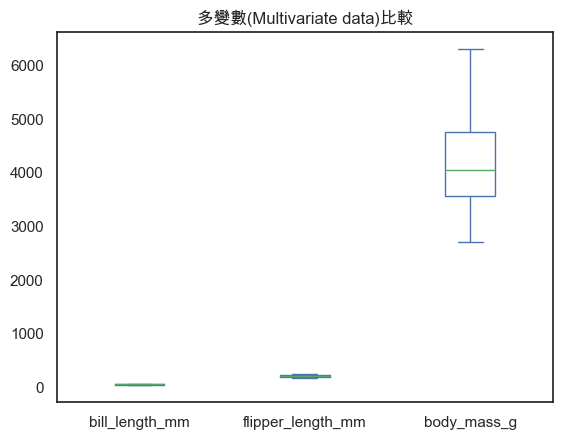

In [63]:
# 喙的長度、腳蹼長度、體重
df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']].plot.box(title='多變數(Multivariate data)比較')
plt.show()

### 因數量的單位不同，造成特徵規模不一致，影響特徵的比較。

## 特徵縮放(Feature Scaling)優點：
### 1. 使特徵規模一致，求解收斂速度快
### 2. 提高模型預測準確率

## 作法:
### 1. MinMaxScaler
### 2. StandardScaler(標準化)

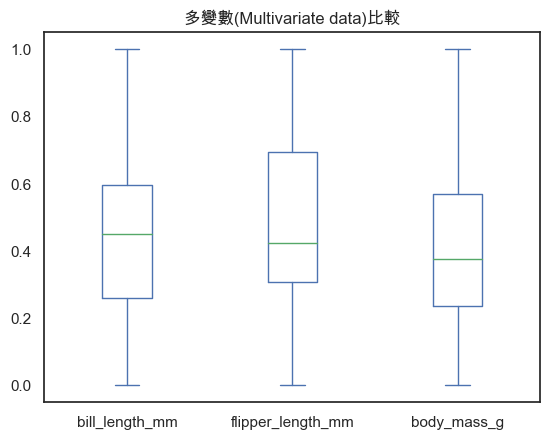

In [64]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']].copy()
df2[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df2)

# Plot the normalized data
df2.plot.box(title='多變數(Multivariate data)比較')
plt.show()

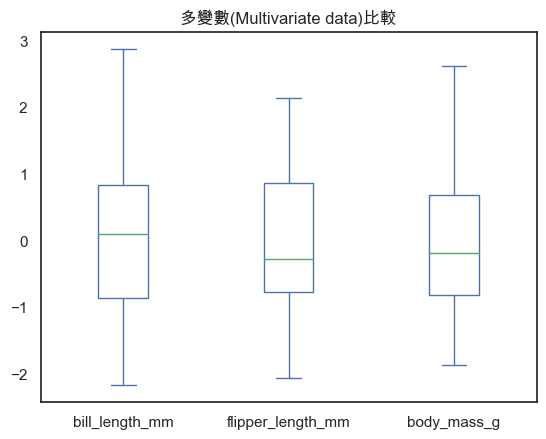

In [65]:
# StandardScaler(標準化)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']].copy()
df2[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df2)

# Plot the normalized data
df2.plot.box(title='多變數(Multivariate data)比較')
plt.show()

## 準確率比較

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df2 = df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species']].copy()
df2.species = df2.species.map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df2 = df2.dropna()
X = df2.drop('species', axis=1)
y = df2.species

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 模型訓練
print(f'*** 使用原始資料 ***') 
model = LinearRegression()
model.fit(X_train, y_train)
# R2、MSE
y_pred = model.predict(X_test)
print(f'R2 = {r2_score(y_test, y_pred)*100:.4f}') 
print(f'MSE = {mean_squared_error(y_test, y_pred):.4f}') 

print(f'\n*** 使用特徵縮放資料 ***') 
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_std, y_train)
# R2、MSE
y_pred = model2.predict(X_test_std)
print(f'R2 = {r2_score(y_test, y_pred)*100:.4f}') 
print(f'MSE = {mean_squared_error(y_test, y_pred):.4f}') 

*** 使用原始資料 ***
R2 = 76.6304
MSE = 0.1730

*** 使用特徵縮放資料 ***
R2 = 76.6304
MSE = 0.1730


### 因特徵數量只有3個，且特徵之間均呈正相關，故特徵縮放並不能提升準確率。

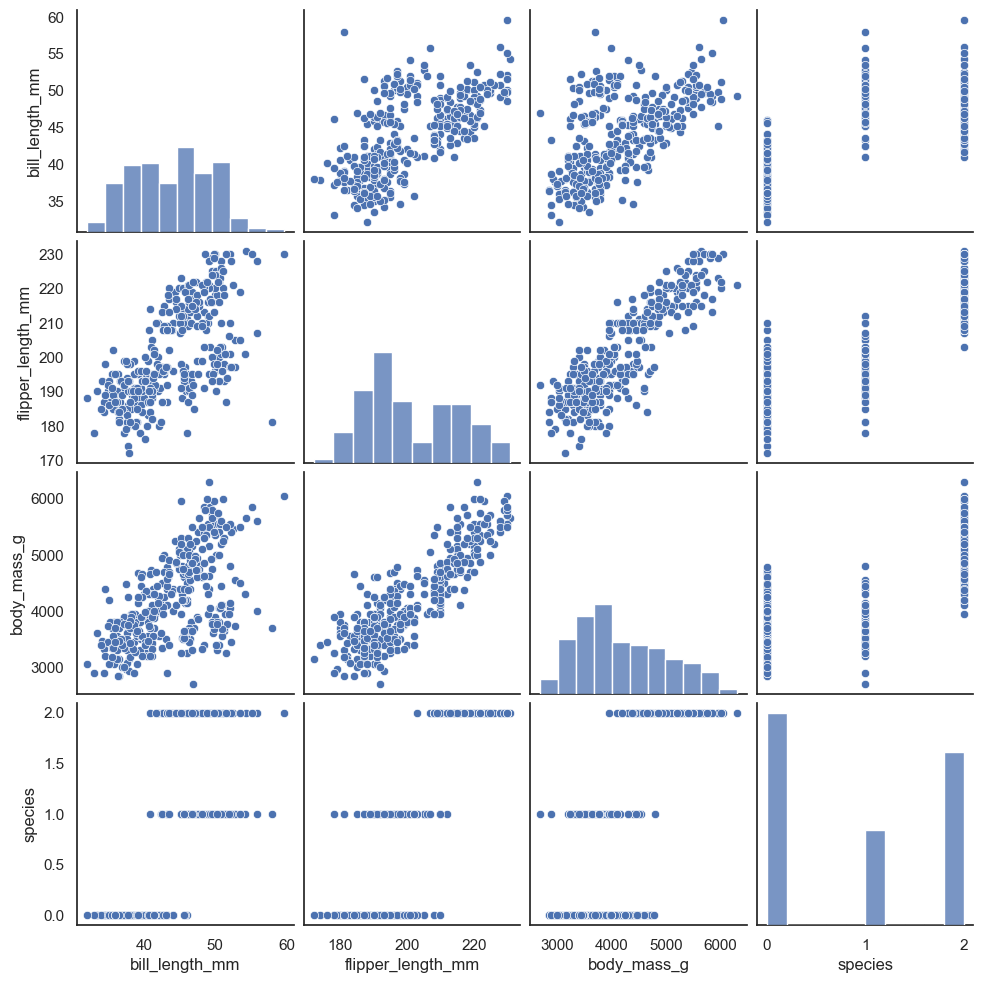

In [71]:
sns.pairplot(data=df2)
plt.show()

## 手寫阿拉伯數字辨識

In [74]:
# 未特徵縮放
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4606 - accuracy: 0.7500
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5753 - accuracy: 0.8548
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4527 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3977 - accuracy: 0.8941
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.9342


[0.2569500207901001, 0.9341999888420105]

In [73]:
# 特徵縮放
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2968 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1432 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1111 - accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0903 - accuracy: 0.9717
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9778


[0.07588664442300797, 0.9778000116348267]

### 特徵數量有784個且差異很大，使用特徵縮放可有效提升準確率。

## 變數之間的關聯(Correlation)
### Pearson相關係數：$\begin{equation}r_{x,y} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})(y_{i} -\bar{y})}{\sqrt{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}(y_{i} -\bar{y})^{2}}}\end{equation}$

In [9]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True, as_frame=True)
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
df = X.copy()
df['y'] = y

In [12]:
# 相關係數
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
y,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

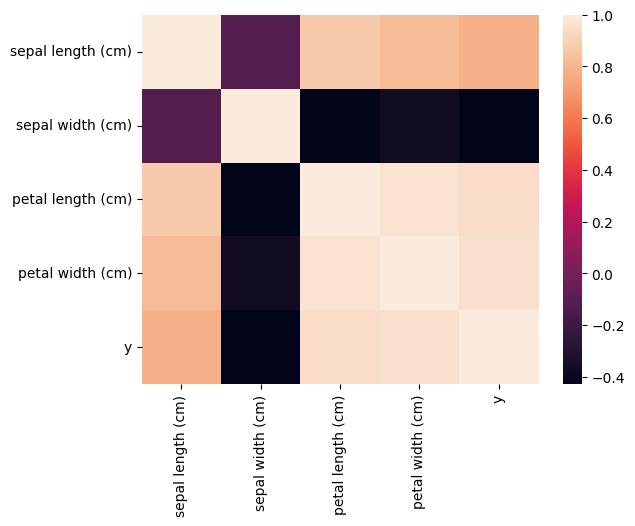

In [13]:
# 繪圖
import seaborn as sns
sns.heatmap(df.corr())

<Axes: >

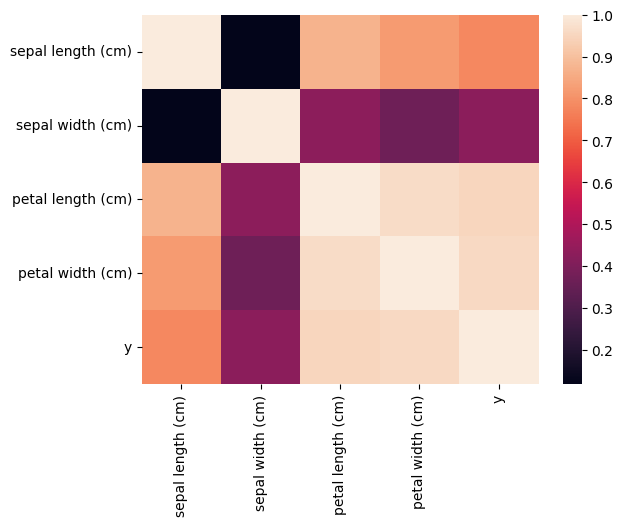

In [14]:
# 取絕對值，才能以顏色判斷關聯度
import seaborn as sns
sns.heatmap(df.corr().abs())

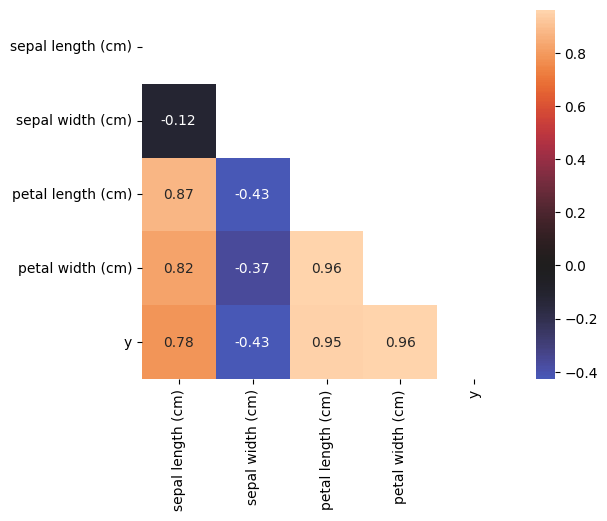

In [17]:
import numpy as np
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), square=True, mask=mask, annot=True, fmt=".2f", center=0);